In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [21]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [22]:
house_price_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [26]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [27]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
house_price_dataframe['price'] = house_price_dataset.target

In [31]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
house_price_dataframe.shape

(20640, 9)

In [35]:
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [37]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [39]:
correlation = house_price_dataframe.corr()

<Axes: >

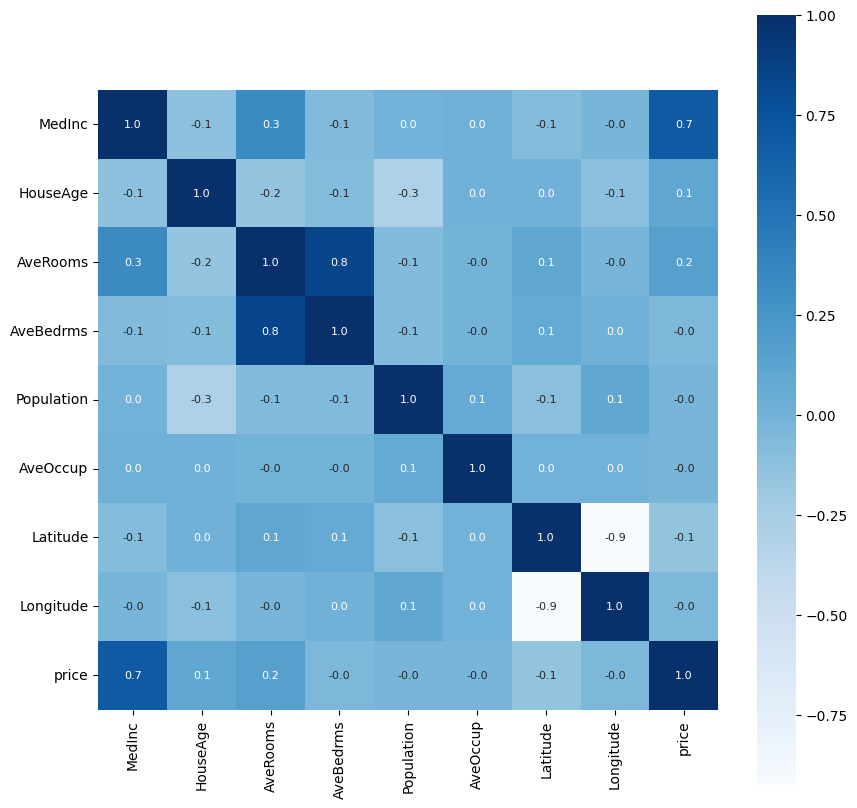

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f',annot=True, annot_kws={'size':8}, cmap = 'Blues')

In [42]:
x = house_price_dataframe.drop(['price'], axis = 1)
y = house_price_dataframe['price']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [46]:
x.shape, x_train.shape, x_test.shape

((20640, 8), (16512, 8), (4128, 8))

Visualizing the actual price and predicted price

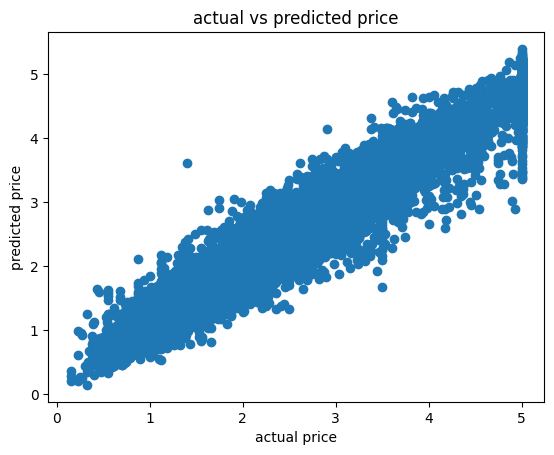

In [60]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted price")
plt.show()

Model training

In [47]:
model = XGBRegressor()

In [49]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction on training data

In [50]:
training_data_prediction = model.predict(x_train)

In [52]:
training_data_prediction

array([1.2811276, 3.5806673, 1.795477 , ..., 2.308142 , 2.5287933,
       3.645046 ], dtype=float32)

In [54]:
score_1 = metrics.r2_score(y_train, training_data_prediction)

In [56]:
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

In [68]:
print("R squared error(training data): ",score_1)
print("Mean absolute error(training data): ",score_2)

R squared error(training data):  0.9445725845802867
Mean absolute error(training data):  0.19257627556572793


Prediction on Test data

In [63]:
test_data_prediction = model.predict(x_test)

In [66]:
test_score1 = metrics.r2_score(y_test, test_data_prediction)
test_score2 = metrics.mean_absolute_error(y_test, test_data_prediction)

In [69]:
print("R squared error(testing data): ", test_score1)
print("Mean absolute error(testing data): ", test_score2)

R squared error(testing data):  0.8301370561019205
Mean absolute error(testing data):  0.30957335413783094
